<a href="https://colab.research.google.com/github/nadimaiza/CNN_multiclass/blob/main/CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)

print(torchvision.__version__)

2.5.1+cu121
0.20.1+cu121


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
training_data = datasets.FashionMNIST(
                root = "data",
                train = True,
                download= True,
                transform = ToTensor())

testing_data = datasets.FashionMNIST(
                root = "data",
                train = False,
                download= True,
                transform = ToTensor())

100%|██████████| 26421880/26421880 [00:20<00:00, 1275702.93it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 145166.60it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2710594.72it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8717108.19it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
print(len(training_data), len(testing_data))
print(training_data, testing_data)

60000 10000
Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
image, label = training_data[0]
label

9

In [ ]:
class_names = training_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_indexes = training_data.class_to_idx
class_indexes

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
image, label = training_data[0]
print(f" Image shape, {image.shape}")

#plt.imshow(image)

#doesnt work because plt is expecing height, weight and last color channel
#but we see with our data shape that we have [channel, h, w].
#we have to remove the extra dimension channel

 Image shape, torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

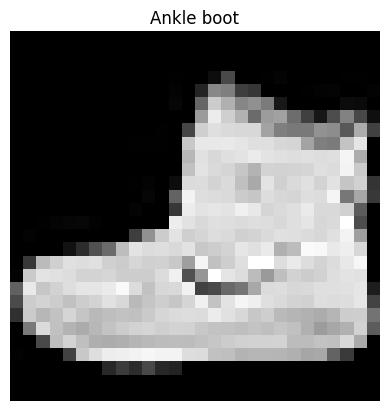

In [ ]:
plt.imshow(image.squeeze(), cmap = 'gray');
plt.title(class_names[label])
plt.axis(False)

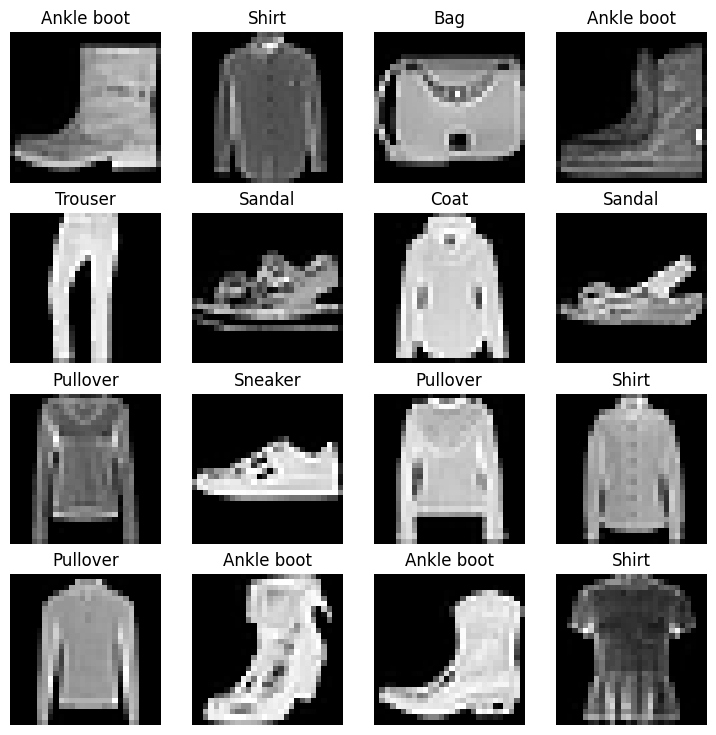

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize= (9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols +1):
    random_idx = torch.randint(0, len(training_data), size = [1]).item()
    img, label = training_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap = "gray")
    plt.title(class_names[label])
    plt.axis(False)

In [ ]:
from torch.utils.data import DataLoader
Batch_size = 32
train__data_loader = DataLoader(dataset= training_data,
                                batch_size= Batch_size,
                                shuffle= True)

test_data_loader = DataLoader(dataset= testing_data,
                              batch_size= Batch_size,
                              shuffle = False)
train__data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x795d992d3820>,
 <torch.utils.data.dataloader.DataLoader at 0x795d992d3730>)

In [ ]:
print(f" lenght training data loader {len(train__data_loader)}")
print(f" lenght testing data loader {len(test_data_loader)}")

 lenght training data loader 1875
 lenght testing data loader 313


In [ ]:
train_batches_features, train_batches_labels = next(iter(train__data_loader))
train_batches_features.shape, train_batches_labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

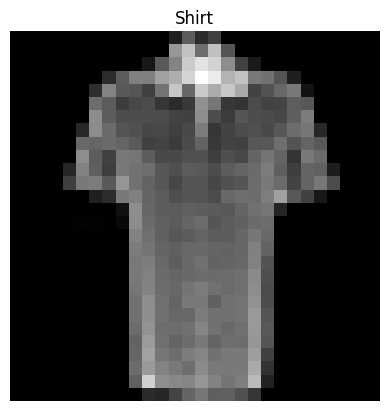

In [ ]:
#show a sample:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_batches_features), size = [1]).item()

img, label = train_batches_features[random_idx], train_batches_labels[random_idx]
plt.imshow(img.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)

In [ ]:
#create a flatten model:
flatten_model = nn.Flatten()
X = train_batches_features[0]
output = flatten_model(X)
print(f"X tensor shape {X.shape} --> [color_channel, height, width]" )
print(f"output tensor shape {output.shape} --> [color_channel, height * width]" )

X tensor shape torch.Size([1, 28, 28]) --> [color_channel, height, width]
output tensor shape torch.Size([1, 784]) --> [color_channel, height * width]


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model0 = FashionMNISTModelV0(input_shape= 28*28, hidden_units= 10, output_shape= len(class_names)).to(device)
next(model0.parameters()).device

device(type='cuda', index=0)

In [ ]:
dummy_x =torch.rand([1, 1, 28, 28]).to(device)
model0(dummy_x)
#will give us 10 random numbers (10 because the output_layer is len(class_name))

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
def accuracy_function(y_pred, y_true):
    correct = torch.eq(y_pred, y_true)
    correct_sum = correct.sum().item()
    acc = correct_sum/len(y_true)
    return acc

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn

In [ ]:
#because we are working with multiclass, the loss function we are going to use is a : nn.CrossEntropyLoss()
loss_func = nn.CrossEntropyLoss()
optimizer_func = torch.optim.SGD(params= model0.parameters(), lr = 0.01)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
start_time = timer()
end_time = timer()
print_train_time(start = start_time, end= end_time)

Train time on None: 0.000 seconds


4.116700000622586e-05

In [ ]:
import torch
from tqdm.auto import tqdm
from timeit import default_timer as timer

# Assuming model0, loss_func, optimizer_func, accuracy_fn, train__data_loader, and test_data_loader are already defined

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_cpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f" Epoch: {epoch}\n----")

    # Training
    training_loss, train_accuracy = 0, 0
    for batch, (X, y) in enumerate(train__data_loader):
        X, y = X.to(device), y.to(device)
        model0.train()
        # Forward pass
        y_training_pred = model0(X)
        # Calculate the loss (per batch)
        loss = loss_func(y_training_pred, y)
        train_accuracy += accuracy_fn(y_true=y, y_pred=y_training_pred.argmax(dim=1))
        training_loss += loss.item()  # Use .item() to get the scalar value

        # Optimizer zero grad
        optimizer_func.zero_grad()
        # Backward pass
        loss.backward()
        # Optimizer step
        optimizer_func.step()

        # Print out progress
        if batch % 400 == 0:
            print(f" we looked at {batch * len(X)}/ {len(train__data_loader.dataset)} samples")

    # Calculate average training loss and accuracy
    training_loss /= len(train__data_loader)
    train_accuracy /= len(train__data_loader)

    # Testing
    testing_loss, test_accuracy = 0, 0
    model0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_data_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            y_test_pred = model0(X_test)
            testing_loss += loss_func(y_test_pred, y_test).item()  # Use .item() to get the scalar value
            test_accuracy += accuracy_fn(y_pred=y_test_pred.argmax(dim=1), y_true=y_test)

    # Calculate average test loss and accuracy
    testing_loss /= len(test_data_loader)
    test_accuracy /= len(test_data_loader)

    # Print out the loss and accuracy
    print(f"\nTrain loss: {training_loss:.5f} | Train acc: {train_accuracy:.2f}% | Test loss: {testing_loss:.5f} | Test acc: {test_accuracy:.2f}%\n")

# Calculate total training time
train_time_end_cpu = timer()
total_train_time0 = train_time_end_cpu - train_time_start_cpu
print(f"Total training time: {total_train_time0:.2f} seconds")


  0%|          | 0/3 [00:00<?, ?it/s]

 Epoch: 0
----
 we looked at 0/ 60000 samples
 we looked at 12800/ 60000 samples
 we looked at 25600/ 60000 samples
 we looked at 38400/ 60000 samples
 we looked at 51200/ 60000 samples

Train loss: 0.90961 | Train acc: 70.87% | Test loss: 0.62902 | Test acc: 78.63%

 Epoch: 1
----
 we looked at 0/ 60000 samples
 we looked at 12800/ 60000 samples
 we looked at 25600/ 60000 samples
 we looked at 38400/ 60000 samples
 we looked at 51200/ 60000 samples

Train loss: 0.55733 | Train acc: 81.09% | Test loss: 0.54409 | Test acc: 81.13%

 Epoch: 2
----
 we looked at 0/ 60000 samples
 we looked at 12800/ 60000 samples
 we looked at 25600/ 60000 samples
 we looked at 38400/ 60000 samples
 we looked at 51200/ 60000 samples

Train loss: 0.50266 | Train acc: 82.75% | Test loss: 0.51368 | Test acc: 82.00%

Total training time: 28.83 seconds


In [ ]:
!nvidia-smi

Wed Jun  5 11:10:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0              29W /  70W |    159MiB / 15360MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
torch.cuda.is_available()

True

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_feature: int, hidden_units: int, output_layer: int):
    super().__init__()
    self.stacked_layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= input_feature, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features= output_layer),
        nn.ReLU())


  def forward(self, x):
    return self.stacked_layers(x)

In [ ]:
torch.manual_seed(42)
model1 = FashionMNISTModelV1(input_feature = 28 *28, hidden_units = 10, output_layer = len(class_names)).to(device)

next(model1.parameters()).device

device(type='cuda', index=0)

In [ ]:
device

device(type='cuda')

In [ ]:
device

device(type='cuda')

In [ ]:
loss_func2 = nn.CrossEntropyLoss()
optimizer_func2 = torch.optim.SGD(params= model1.parameters(), lr = 0.1)

In [ ]:
torch.manual_seed(42)
epochs = 3
train_time_start_cpu = timer()
for epoch in tqdm(range(epochs)):
    print(f" Epoch: {epoch}\n----")
    training_loss, training_accuracy = 0, 0
    for batch, (X, y) in enumerate(train__data_loader):
      X, y = X.to(device), y.to(device)
      model1.train()
      y_train_pred = model1(X)
      loss = loss_func2(y_train_pred, y)
      training_loss += loss.item()
      training_accuracy += accuracy_fn(y_true = y, y_pred = y_train_pred.argmax(dim=1))


      optimizer_func.zero_grad()
      loss.backward()
      optimizer_func.step()

      if batch %400 ==0:
        print(f"we looked at {batch *len(X)} / {len(train__data_loader)}")



    training_loss /= len(train__data_loader)
    training_accuracy /= len(train__data_loader)



    #testing:
    testing_loss, testing_accuracy = 0, 0

    model1.eval()
    with torch.inference_mode():
      for X_test, y_test in test_data_loader:
        X_test, y_test = X_test.to(device), y_test.to(device)
        y_test_pred = model1(X_test)
        testing_loss += loss_func(y_test_pred, y_test).item()  # Use .item() to get the scalar value
        testing_accuracy += accuracy_fn(y_pred=y_test_pred.argmax(dim=1), y_true=y_test)

    # Calculate average test loss and accuracy
    testing_loss /= len(test_data_loader)
    testing_accuracy /= len(test_data_loader)

    # Print out the loss and accuracy
    print(f"\nTrain loss: {training_loss:.5f} | Train acc: {training_accuracy:.2f}% | Test loss: {testing_loss:.5f} | Test acc: {testing_accuracy:.2f}%\n")

# Calculate total training time
train_time_end_cpu = timer()
total_train_time1 = train_time_end_cpu - train_time_start_cpu
print(f"Total training time: {total_train_time1:.2f} seconds")







  0%|          | 0/3 [00:00<?, ?it/s]

 Epoch: 0
----
we looked at 0 / 1875
we looked at 12800 / 1875
we looked at 25600 / 1875
we looked at 38400 / 1875
we looked at 51200 / 1875

Train loss: 2.30166 | Train acc: 11.31% | Test loss: 2.30211 | Test acc: 10.75%

 Epoch: 1
----
we looked at 0 / 1875
we looked at 12800 / 1875
we looked at 25600 / 1875
we looked at 38400 / 1875
we looked at 51200 / 1875

Train loss: 2.30166 | Train acc: 11.31% | Test loss: 2.30211 | Test acc: 10.75%

 Epoch: 2
----
we looked at 0 / 1875
we looked at 12800 / 1875
we looked at 25600 / 1875
we looked at 38400 / 1875
we looked at 51200 / 1875

Train loss: 2.30166 | Train acc: 11.31% | Test loss: 2.30211 | Test acc: 10.75%

Total training time: 30.34 seconds


In [ ]:
train_time_start_cpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f" Epoch: {epoch}\n----")
    training_loss, training_accuracy = 0, 0

    model1.train()
    for batch, (X, y) in enumerate(train__data_loader):
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_train_pred = model1(X)
        loss = loss_func2(y_train_pred, y)

        # Backward pass and optimization
        optimizer_func.zero_grad()
        loss.backward()
        optimizer_func.step()

        # Accumulate training loss and accuracy
        training_loss += loss.item()
        training_accuracy += accuracy_fn(y_true=y, y_pred=y_train_pred.argmax(dim=1))

        if batch % 400 == 0:
            print(f"we looked at {batch * len(X)} / {len(train__data_loader.dataset)} samples")

    # Calculate average training loss and accuracy
    training_loss /= len(train__data_loader)
    training_accuracy /= len(train__data_loader)

    # Testing loop
    testing_loss, testing_accuracy = 0, 0

    model1.eval()
    with torch.inference_mode():
        for X_test, y_test in test_data_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)

            y_test_pred = model1(X_test)
            testing_loss += loss_func2(y_test_pred, y_test).item()
            testing_accuracy += accuracy_fn(y_pred=y_test_pred.argmax(dim=1), y_true=y_test)

    # Calculate average test loss and accuracy
    testing_loss /= len(test_data_loader)
    testing_accuracy /= len(test_data_loader)

    # Print out the loss and accuracy
    print(f"\nTrain loss: {training_loss:.5f} | Train acc: {training_accuracy:.2f}% | Test loss: {testing_loss:.5f} | Test acc: {testing_accuracy:.2f}%\n")

# Calculate total training time
train_time_end_cpu = timer()
total_train_time = train_time_end_cpu - train_time_start_cpu
print(f"Total training time: {total_train_time:.2f} seconds")
print(len(y))

  0%|          | 0/3 [00:00<?, ?it/s]

 Epoch: 0
----
we looked at 0 / 60000 samples
we looked at 12800 / 60000 samples
we looked at 25600 / 60000 samples
we looked at 38400 / 60000 samples
we looked at 51200 / 60000 samples

Train loss: 2.30166 | Train acc: 11.31% | Test loss: 2.30211 | Test acc: 10.75%

 Epoch: 1
----
we looked at 0 / 60000 samples
we looked at 12800 / 60000 samples
we looked at 25600 / 60000 samples
we looked at 38400 / 60000 samples
we looked at 51200 / 60000 samples

Train loss: 2.30166 | Train acc: 11.31% | Test loss: 2.30211 | Test acc: 10.75%

 Epoch: 2
----
we looked at 0 / 60000 samples
we looked at 12800 / 60000 samples
we looked at 25600 / 60000 samples
we looked at 38400 / 60000 samples
we looked at 51200 / 60000 samples

Train loss: 2.30166 | Train acc: 11.31% | Test loss: 2.30211 | Test acc: 10.75%

Total training time: 28.66 seconds
32


In [ ]:
def training_loop(model: torch.nn.Module(),
                  data_loader: torch.utils.data.DataLoader,
                  loss_fn: torch.nn.Module,
                  accuracy_fn,
                  optimizer: torch.optim.Optimizer,
                  device: torch.device = device):

  """Performs a traning with a model trying to learn on data_loader"""


  training_loss, train_accuracy = 0, 0



  #put the model into training mode:
  model.train()

  #iterate through images and labels in the data loader:
  for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_training_pred = model(X)

        #calculate the loss and accuracy per batch:
        loss = loss_fn(y_training_pred, y)
        training_loss += loss.item()
        train_accuracy += accuracy_fn(y_true = y, y_pred = y_training_pred.argmax(dim = 1)) #we go from logits to prediction labels



        # Optimizer zero grad
        optimizer_func.zero_grad()

        # Backward pass
        loss.backward()

        # Optimizer step
        optimizer.step()

        # Print out progress
        if batch % 400 == 0:
            print(f" we looked at {batch * len(X)}/ {len(data_loader.dataset)} samples")

  # Calculate average training loss and accuracy
  training_loss /= len(data_loader)
  train_accuracy /= len(data_loader)
  print(f"Training Loss: {training_loss:.5f} | Training Accuracy: {train_accuracy:.2f}")




In [ ]:
def testing_loop(model: torch.nn.Module,
                 data_loader: torch.utils.data.DataLoader,
                 optimizer: torch.optim.Optimizer,
                 loss_fn: torch.nn.Module,
                 accuracy_fn,
                 device: torch.device = device):


  testing_loss, testing_accuracy = 0,0

  model.eval()
  with torch.inference_mode():

    for X, y in data_loader: #here we didnt specify X_test, y_test because we are in a different function (reinitialize)
      X, y = X.to(device), y.to(device)
      y_testing_pred = model(X)

      loss = loss_func2(y_testing_pred, y)
      testing_loss += loss.item()
      testing_accuracy += accuracy_fn(y_true = y, y_pred = y_testing_pred.argmax(dim =1))


    #Calculate average testing loss and accuracy:
    testing_loss /= len(data_loader)
    testing_accuracy /= len(data_loader)
    print(f"Testing Loss: {testing_loss:.5f} | Testing Accuracy: {testing_accuracy:.2f}")

In [ ]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_gpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  training_loop(model = model0,
             data_loader = train__data_loader,
             optimizer =optimizer_func,
             loss_fn = loss_func,
             accuracy_fn = accuracy_fn,
             device = device)



  testing_loop(model = model0,
               data_loader = test_data_loader,
               optimizer = optimizer_func,
               loss_fn = loss_func2,
               accuracy_fn = accuracy_fn,
               device = device)



train_time_end_gpu = timer()
total_train_time0 = print_train_time(start = train_time_start_gpu, end = train_time_end_gpu)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
 we looked at 0/ 60000 samples
 we looked at 12800/ 60000 samples
 we looked at 25600/ 60000 samples
 we looked at 38400/ 60000 samples
 we looked at 51200/ 60000 samples
Training Loss: 0.47675 | Training Accuracy: 83.56
Testing Loss: 0.49344 | Testing Accuracy: 82.80
Epoch: 1
---------
 we looked at 0/ 60000 samples
 we looked at 12800/ 60000 samples
 we looked at 25600/ 60000 samples
 we looked at 38400/ 60000 samples
 we looked at 51200/ 60000 samples
Training Loss: 0.46081 | Training Accuracy: 84.04
Testing Loss: 0.48186 | Testing Accuracy: 83.13
Epoch: 2
---------
 we looked at 0/ 60000 samples
 we looked at 12800/ 60000 samples
 we looked at 25600/ 60000 samples
 we looked at 38400/ 60000 samples
 we looked at 51200/ 60000 samples
Training Loss: 0.44943 | Training Accuracy: 84.48
Testing Loss: 0.47473 | Testing Accuracy: 83.47
Train time on None: 28.137 seconds


In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn
               ):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_func(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model0_results = eval_model(model=model0, data_loader=test_data_loader,
    loss_fn=loss_func, accuracy_fn=accuracy_fn
)
model0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4747343063354492,
 'model_acc': 83.46645367412141}

# CODING A CNN MODEL:

In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels= input_shape,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2))

    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels= hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = output_shape,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2))


    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units*7*7, #there is a trick here: #output shape of conv1 torch.Size([1, 10, 14, 14])
                                             #|output shape of conv2 torch.Size([1, 10, 7, 7])
                                             #(these are the shape that we get from running our model its the printing x.shape)
                                             #mat1 and mat2 shapes cannot be multiplied (1x490 and 10x10)
                                             #so we must have ((1x490 and 490x10)) to compute (we get the 490 from 1*10*7*7)
                                             #so the hidden unit for the classifier should also be 490 (basic matrix multiplication)
                                             #thats why we put 7*7 with the hidden unit

                  out_features= output_shape)

    )

  def forward(self, x):
    x = self.conv_block1(x)
    #print(f"output shape of conv1 {x.shape}") #them to not have a huge printing output when testing the model
    x = self.conv_block2(x)
    #print(f"output shape of conv2 {x.shape}")
    x = self.classifier(x)
    #print(f"output shape of classifier {x.shape}")
    return x

In [ ]:
model2 = FashionMNISTModelV2(input_shape = 1, #because we are working with gray images so we have 1 color channel
                             hidden_units =10,
                             output_shape= len(class_names))

model2.to(device)

FashionMNISTModelV2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
images = torch.randn(size = (32, 3, 64, 64))
test_image = images[0]
print(images.shape)
print(test_image.shape)
print(test_image)

torch.Size([32, 3, 64, 64])
torch.Size([3, 64, 64])
tensor([[[-0.4617, -0.5741,  0.5184,  ..., -0.2794,  0.8709,  0.7626],
         [ 0.8264,  0.1035, -0.1587,  ...,  0.2875, -0.6253,  1.5168],
         [ 2.0317,  0.3407,  1.1845,  ...,  1.3265,  0.2963,  0.1716],
         ...,
         [ 0.7693, -0.3584, -1.1657,  ...,  0.7561,  1.0142, -0.6882],
         [ 0.2887, -1.9256, -1.6497,  ...,  0.3002, -1.4851,  0.0425],
         [ 1.3571,  0.6956,  0.1320,  ..., -0.2924,  0.4062, -0.7290]],

        [[ 2.0710,  0.1412,  0.1219,  ...,  0.6090, -0.2900, -0.6141],
         [-1.4137,  0.9585,  0.6750,  ..., -0.7784, -1.1062,  0.1794],
         [-0.5527, -0.6771, -1.3900,  ..., -0.1571,  0.3206,  1.1391],
         ...,
         [ 0.3468,  1.6808, -1.0219,  ...,  0.3972, -1.6283,  0.8811],
         [ 0.3668, -0.7966,  0.7823,  ..., -0.3277,  0.9359, -0.3366],
         [-0.2408, -1.7686,  1.0921,  ..., -1.9394,  0.1385,  0.9314]],

        [[ 0.8681, -0.9268, -0.9903,  ..., -0.7076, -0.7933, -0.

In [ ]:
#create a single conv2d layer:
conv_layer = nn.Conv2d(in_channels= 3, #in_channels is the number of color channel that our data has (32, |3|, 64, 64))
                       out_channels= 10,
                       kernel_size = (3,3),
                       padding = 0,
                       stride = 1)



conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

In [ ]:
conv_layer2 = nn.Conv2d(in_channels = 3,
                        out_channels = 10,
                        kernel_size = (5,5),
                        padding = 0,
                        stride = 2)
conv_output2 = conv_layer2(test_image.unsqueeze(0))
conv_output2.shape

torch.Size([1, 10, 30, 30])

In [ ]:
torch.__version__

'2.3.0+cu121'

In [ ]:
image.shape

torch.Size([1, 28, 28])

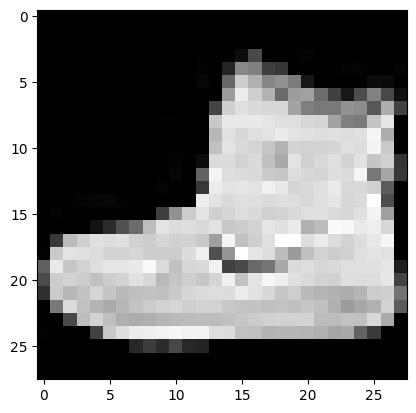

In [ ]:
plt.imshow(image.squeeze(), cmap = "gray")

In [ ]:
#testing with another image:
random_image = torch.randn(size =(1, 28, 28)).to(device)
random_image.shape
model2(random_image.unsqueeze(0))


tensor([[ 0.0387, -0.0474, -0.0533,  0.0204,  0.0511,  0.0113,  0.0239,  0.0519,
         -0.0391,  0.0489]], device='cuda:0', grad_fn=<AddmmBackward0>)

you see how now our model2(random_image.unsqueeze(0)) works ,its because we were able to return matrix that are multipliable     
(1x490, 490x10)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer_func = torch.optim.SGD(params = model2.parameters(), lr = 0.1)

In [ ]:
model2.state_dict()

OrderedDict([('conv_block1.0.weight',
              tensor([[[[-0.0781,  0.3062, -0.0730],
                        [ 0.0673, -0.1623,  0.1958],
                        [ 0.2938, -0.2445,  0.2897]]],
              
              
                      [[[ 0.0624,  0.2463,  0.0451],
                        [ 0.1607, -0.0471,  0.2570],
                        [ 0.0493, -0.1556,  0.0850]]],
              
              
                      [[[-0.1536, -0.0391, -0.1354],
                        [ 0.2211, -0.2631, -0.1537],
                        [-0.0941, -0.2004,  0.0315]]],
              
              
                      [[[-0.3292,  0.3010, -0.2832],
                        [ 0.2573,  0.0555, -0.1082],
                        [ 0.2060,  0.0520,  0.2693]]],
              
              
                      [[[ 0.0364, -0.1051,  0.0896],
                        [-0.0904,  0.1403,  0.2976],
                        [ 0.1927, -0.1457,  0.1924]]],
              
              
       

# Time to create a training-testing for our model2

In [ ]:
torch.manual_seed(42)
from timeit import default_timer as timer

train_time_start_model2 = timer()



epochs = 3

for epoch in tqdm(range(epochs)):
  print(f" Epoch: {epoch}\n---------")

  training_loop(model = model2,
                data_loader = train__data_loader,
                loss_fn = loss_fn,
                optimizer = optimizer_func,
                accuracy_fn= accuracy_fn,
                device = device)


  testing_loop(model = model2,
               data_loader = test_data_loader,
               loss_fn = loss_fn,
               optimizer = optimizer_func,
               accuracy_fn = accuracy_fn,
               device = device)

train_time_end_model2 = timer()
total_train_time2 = print_train_time(start = train_time_start_model2, end = train_time_end_model2)

  0%|          | 0/3 [00:00<?, ?it/s]

 Epoch: 0
---------
 we looked at 0/ 60000 samples
 we looked at 12800/ 60000 samples
 we looked at 25600/ 60000 samples
 we looked at 38400/ 60000 samples
 we looked at 51200/ 60000 samples
Training Loss: 1.74211 | Training Accuracy: 33.31
Testing Loss: 0.49057 | Testing Accuracy: 82.65
 Epoch: 1
---------
 we looked at 0/ 60000 samples
 we looked at 12800/ 60000 samples
 we looked at 25600/ 60000 samples
 we looked at 38400/ 60000 samples
 we looked at 51200/ 60000 samples
Training Loss: 0.43232 | Training Accuracy: 84.30
Testing Loss: 0.40419 | Testing Accuracy: 85.26
 Epoch: 2
---------
 we looked at 0/ 60000 samples
 we looked at 12800/ 60000 samples
 we looked at 25600/ 60000 samples
 we looked at 38400/ 60000 samples
 we looked at 51200/ 60000 samples
Training Loss: 0.36774 | Training Accuracy: 86.62
Testing Loss: 0.35165 | Testing Accuracy: 87.42
Train time on None: 35.055 seconds


In [ ]:
model0_results = eval_model(model = model0,
                            data_loader = test_data_loader,
                            loss_fn = loss_func,
                            accuracy_fn = accuracy_fn)
model0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4747343063354492,
 'model_acc': 83.46645367412141}

In [ ]:
model1_results = eval_model(model = model1,
                            data_loader = test_data_loader,
                            loss_fn = loss_func,
                            accuracy_fn = accuracy_fn)

model1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 2.3021068572998047,
 'model_acc': 10.75279552715655}

In [ ]:
model2_results = eval_model(model = model2,
                            data_loader = test_data_loader,
                            loss_fn = loss_func,
                            accuracy_fn = accuracy_fn)

model2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.35164833068847656,
 'model_acc': 87.42012779552715}

In [ ]:
import pandas as pd

models_result = pd.DataFrame([model0_results, model1_results, model2_results])
models_result

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.474734,83.466454
1,FashionMNISTModelV1,2.302107,10.752796
2,FashionMNISTModelV2,0.351648,87.420128


In [ ]:
#add training_time:
models_result['training_time'] = [total_train_time0, total_train_time1, total_train_time2]
models_result

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.474734,83.466454,28.137308
1,FashionMNISTModelV1,2.302107,10.752796,30.337690
2,FashionMNISTModelV2,0.351648,87.420128,35.055089


Text(0, 0.5, 'model_name')

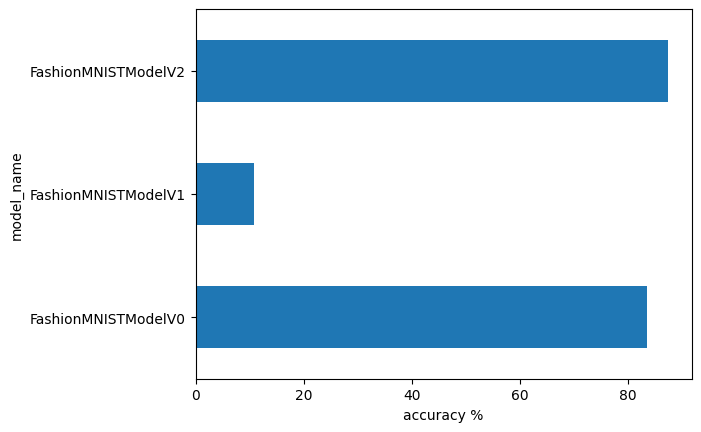

In [ ]:
models_result.set_index('model_name')["model_acc"].plot(kind = "barh")
plt.xlabel('accuracy %')
plt.ylabel('model_name')

In [ ]:
#make predictions with random data:

In [ ]:
def make_predictions(model :torch.nn.Module,
                     data : list,
                     device : torch.device = device):


  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim = 0).to(device) #unsqueeze

      #forward pass (models output are going to be logits):
      pred_logit = model(sample)

      #get prediction:
      pred_prob = torch.softmax(pred_logit.squeeze(),dim = 0)

      pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_sample = []
test_label = []


for sample, label in random.sample(list(testing_data), k = 9):
  test_sample.append(sample)
  test_label.append(label)


In [ ]:
pred_probs = make_predictions(model = model2, data = test_sample)

pred_probs[:1]

tensor([[3.9403e-06, 1.1056e-07, 2.1602e-07, 1.2783e-06, 6.5212e-09, 9.9944e-01,
         1.4696e-05, 2.3294e-06, 7.5377e-05, 4.6145e-04]])

In [ ]:
pred_classes = pred_probs.argmax(dim =1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
len(test_sample)

9

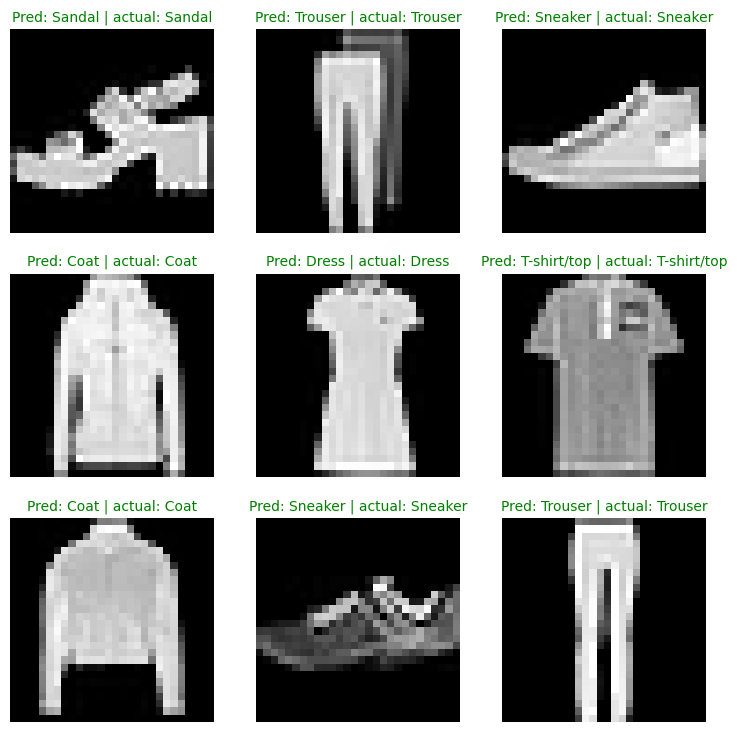

In [ ]:
plt.figure(figsize = (9,9))
nrows, ncols = 3, 3
for i, sample in enumerate(test_sample):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap = 'gray')
  plt.axis(False)


  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_label[i]]

  title_text = f"Pred: {pred_label} | actual: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c = 'g')
  else:
    plt.title(title_text, fontsize = 10, c = 'r')


In [ ]:
y_preds = []
model2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_data_loader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)
    y_logit = model2(X)
    y_pred = y_logit.argmax(dim = 1)
    y_preds.append(y_pred)


y_pred_tensor = torch.cat(y_preds).to(device)
y_pred_tensor[:10]
print(len(y))

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

16


In [ ]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 57.3 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [ ]:
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19

0.23.1


In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix


In [ ]:
conf_mat = ConfusionMatrix(num_classes= len(class_names), task = 'multiclass')
conf_mat_tensor = conf_mat(preds = y_pred_tensor, target = testing_data.targets.to(device))

RuntimeError: Encountered different devices in metric calculation (see stacktrace for details). This could be due to the metric class not being on the same device as input. Instead of `metric=MulticlassConfusionMatrix(...)` try to do `metric=MulticlassConfusionMatrix(...).to(device)` where device corresponds to the device of the input.

In [ ]:
len(y_pred_tensor)